# Prediksi Harga Rumah

- data dan kode diperoleh dari https://github.com/adimasmudi/house_prediction
- link kode: https://github.com/GilangAgungS/house-prediction-fix1


## Import Data yang digunakan

In [1]:
import pandas as pd

import dengan lokasi file di google drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

import dengan lokasi file di komputer (local)

In [3]:
dataset = pd.read_csv('kc_house_data.csv')

## 1. Data Understanding

Memanggil library yang dibutuhkan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

membuka dataset

In [5]:
# Membuka file data dari google drive

# df = pd.read_csv('/content/drive/My Drive/latian prediksi harga rumah/kc_house_data.csv')
# df

In [6]:
# Membuka file data dari komputer (local)

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Data diatas memuat banyak informasi, namun untuk melakukan prediksi harga rumah, variabel yang dibutuhkan yaitu:
- Variabel independen: 'floors','bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built'
- Variabel dependen (yang dipengaruhi oleh variabel independen): 'price'

membuat variabel dataFrame yang berisi data independen dan dependen yang dibutuhkan

In [7]:
# Memuat data dari google drive
# dataFrame = pd.read_csv('/content/drive/My Drive/latian prediksi harga rumah/kc_house_data.csv', usecols=['floors','bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built','price'])

# Memuat data dari komputer (local)
dataFrame = pd.read_csv('kc_house_data.csv', usecols=['floors','bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built','price'])
dataFrame

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900.0,3,1.00,1180,1.0,7,1955
1,538000.0,3,2.25,2570,2.0,7,1951
2,180000.0,2,1.00,770,1.0,6,1933
3,604000.0,4,3.00,1960,1.0,7,1965
4,510000.0,3,2.00,1680,1.0,8,1987
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,8,2009
21609,400000.0,4,2.50,2310,2.0,8,2014
21610,402101.0,2,0.75,1020,2.0,7,2009
21611,400000.0,3,2.50,1600,2.0,8,2004


Penjelasan dari kolom diatas:
- bedrooms : jumlah kamar tidur
- bathrooms : jumlah kamar mandi
- sqft_living : luas ruangan dalam satuan sqft (square feet)
- floors : jumlah lantai
- grade : klasifikasi dari kelas rumah
- yr_built : tahun bangunan
- price : harga rumah ($)

Melihat 10 data teratas

In [8]:
#melihat 10 data teratas
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900.0,3,1.00,1180,1.0,7,1955
1,538000.0,3,2.25,2570,2.0,7,1951
2,180000.0,2,1.00,770,1.0,6,1933
3,604000.0,4,3.00,1960,1.0,7,1965
4,510000.0,3,2.00,1680,1.0,8,1987
5,1225000.0,4,4.50,5420,1.0,11,2001
6,257500.0,3,2.25,1715,2.0,7,1995
7,291850.0,3,1.50,1060,1.0,7,1963
8,229500.0,3,1.00,1780,1.0,7,1960
9,323000.0,3,2.50,1890,2.0,7,2003


Melihat 10 data terbawah

In [9]:
#melihat data terbawah
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
21603,507250.0,3,2.50,2270,2.0,8,2003
21604,429000.0,3,2.00,1490,3.0,8,2014
21605,610685.0,4,2.50,2520,2.0,9,2014
21606,1007500.0,4,3.50,3510,2.0,9,2009
21607,475000.0,3,2.50,1310,2.0,8,2008
21608,360000.0,3,2.50,1530,3.0,8,2009
21609,400000.0,4,2.50,2310,2.0,8,2014
21610,402101.0,2,0.75,1020,2.0,7,2009
21611,400000.0,3,2.50,1600,2.0,8,2004
21612,325000.0,2,0.75,1020,2.0,7,2008


Melihat jumlah baris dan kolom

In [10]:
#melihat jumlah baris dan kolom
dataFrame.shape

(21613, 7)

Melihat nama kolom, jumlah data, dan tipe data

In [11]:
#melihat nama kolom, jumlah data, dan tipe data
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   grade        21613 non-null  int64  
 6   yr_built     21613 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


dari data diatas dapat dilihat bahwa kolom 'bathrooms' dan 'floors' memiliki tipe data float, kita perlu ubah menjadi integer karena nilai dari kolom 'bathrooms' dan 'floors' harus bilangan bulat

Melihat nilai dengan jumlah data yang ada pada kolom 'bedrooms'

In [13]:
#melihat nilai dengan jumlah data terbanyak pada kolom 'bedrooms'
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

dari data diatas menunjukkan ada 'bedrooms' dengan nilai 33, nilai tersebut dirasa kurang masuk akal untuk sebuah rumah, jadi kita akan menghapusnya di tahap selanjutnya 

## 2. Data Preparation
#### Data preparation adalah proses pengumpulan, penggabungan, penataan, dan pengorganisasian data sehingga dapat digunakan dalam analitik, dan visualisasi data

In [14]:
#melihat data yang kosong
dataFrame.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
grade          0
yr_built       0
dtype: int64

Dari hasil diatas tidak ada data yang kosong, sehingga tidak perlu melakukan manipulasi data kosong

Mengubah tipe data pada kolom 'bathrooms' (dari float ke integer) karena data 'bathroom' harus bilangan bulat

In [15]:
#mengubah tipe data kolom 'bathrooms' menjadi integer(int)
dataFrame['bathrooms'] = dataFrame['bathrooms'].astype(int)
dataFrame.dtypes

price          float64
bedrooms         int64
bathrooms        int32
sqft_living      int64
floors         float64
grade            int64
yr_built         int64
dtype: object

Mengubah tipe data pada kolom 'floors' (dari float ke integer) karena data 'floors' harus bilangan bulat

In [16]:
#mengubah tipe data kolom 'floors' menjadi integer(int)
dataFrame['floors'] = dataFrame['floors'].astype(int)
dataFrame.dtypes

price          float64
bedrooms         int64
bathrooms        int32
sqft_living      int64
floors           int32
grade            int64
yr_built         int64
dtype: object

Menghapus nilai 33 pada kolom 'bedroom'

In [17]:
#menghapus data dengan 'bedrooms' dengan nilai 33
dataFrame = dataFrame[dataFrame['bedrooms'] != 33]

In [84]:
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan

In [18]:
#cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan
dataFrame[dataFrame['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built


dari hasil diatas menunjukkan bahwa sudah tidak ada nilai 33 pada kolom 'bedrooms'

Melihat rangkuman statistik seperti rata-rata, median, dll pada kolom

In [83]:
# Melihat rangkuman statistik seperti rata-rata, median, dll pada kolom
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,1.749769,2079.921016,1.446234,7.656904,1971.006247
std,3.671351e+05,0.907982,0.734872,918.456818,0.551898,1.175477,29.373636
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.218375e+05,3.000000,1.000000,1426.500000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,1.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,2.000000,8.000000,1997.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.000000,13.000000,2015.000000


### EDA(Exploratory Data Analysis)
#### Exploratory Data Analysis adalah proses untuk melihat pola-pola tertentu dalam data

In [19]:
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900.0,3,1,1180,1,7,1955
1,538000.0,3,2,2570,2,7,1951
2,180000.0,2,1,770,1,6,1933
3,604000.0,4,3,1960,1,7,1965
4,510000.0,3,2,1680,1,8,1987


Membuat pairplot untuk melihat hubungan antar variabel

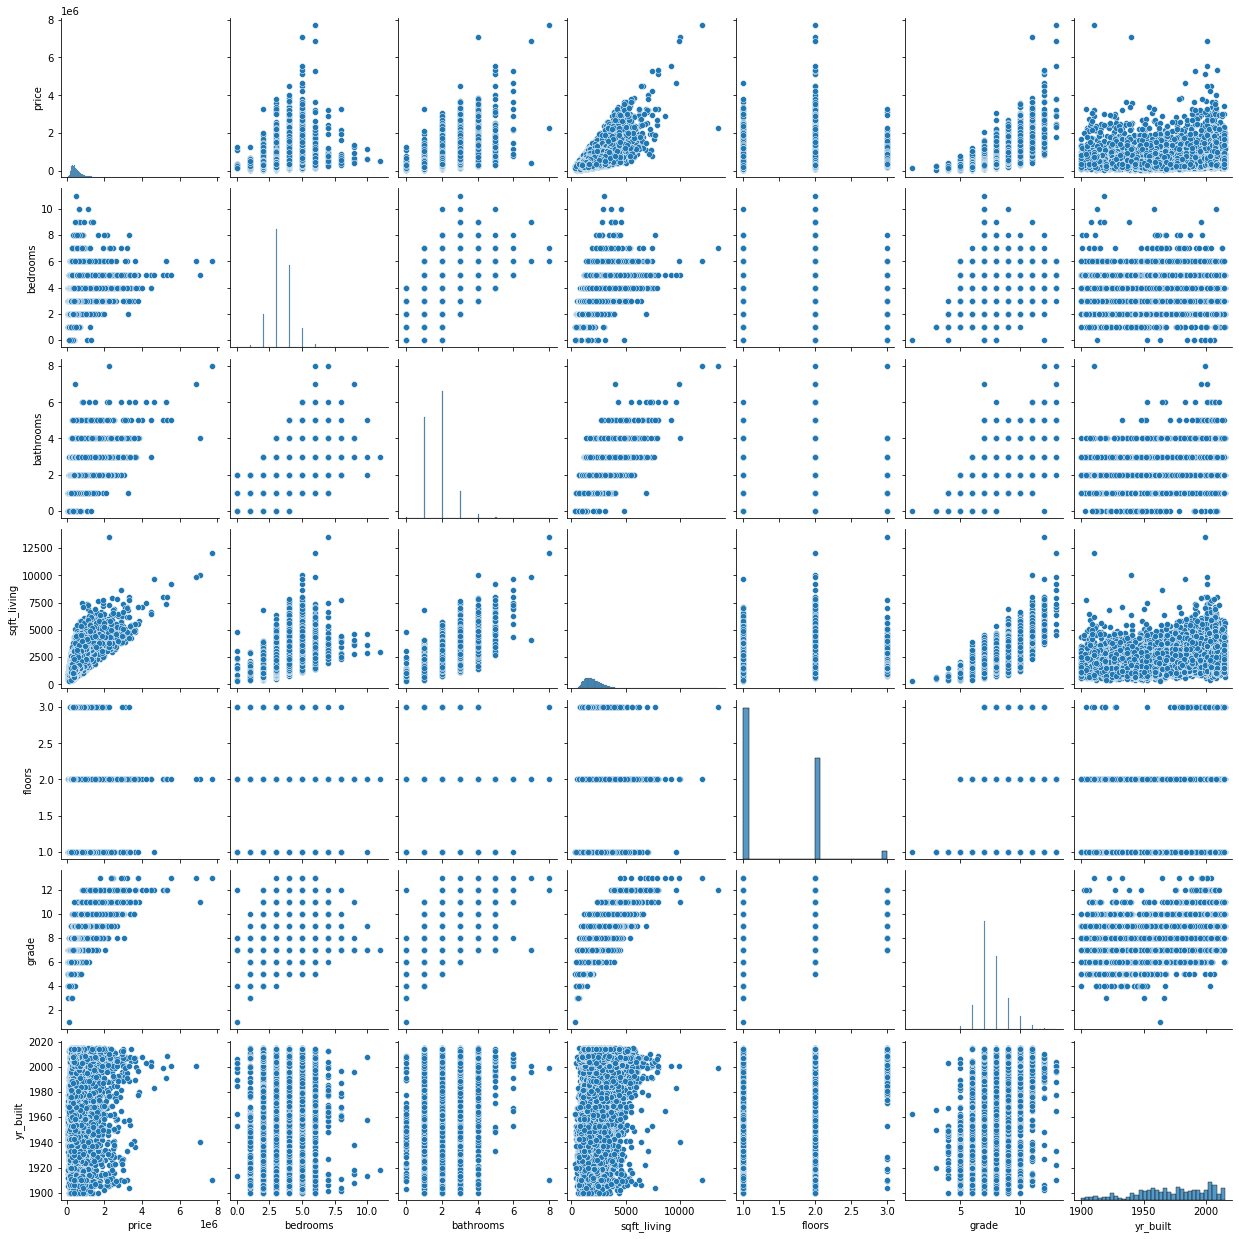

In [20]:
# membuat pairplot untuk melihat hubungan antar variabel
sns.pairplot(dataFrame)

### Melakukan Univariate Analysis 
#### Univariate Analysis berfungsi untuk menganalisa tiap variabel tanpa melihat hubungan dengan variabel lain.

univariate analysis variabel 'bedrooms'

C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


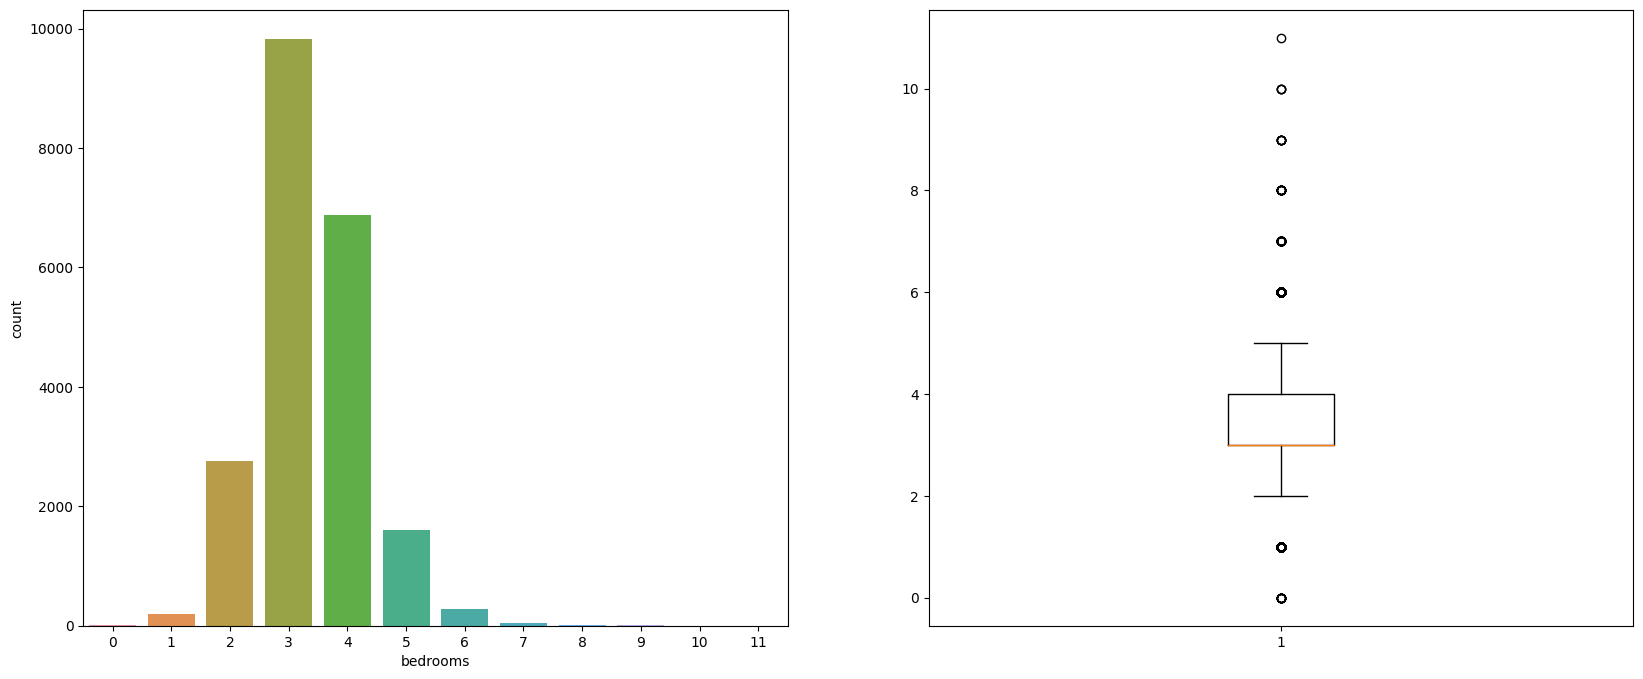

In [21]:
# univariate analysis variabel 'bedrooms'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
#plot kiri
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bedrooms'])

#plot kanan
f.add_subplot(1,2,2)
plt.boxplot(dataFrame['bedrooms'])
plt.show()

informasi:
- kebanyakan jumlah bedrooms dalam rumah adalah 3 dan 4
- banyak memiliki outliers dilihat dari data diluar garis minimum dan maksimum

univariate analysis variabel 'bathrooms'

C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


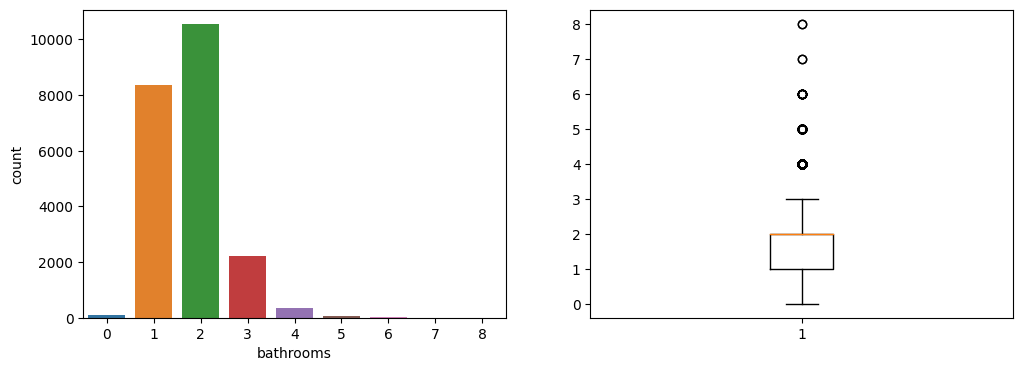

In [22]:
# univariate analysis variabel 'bathrooms'
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['bathrooms'])
plt.show()

In [23]:
#melihat nilai tertinggi pada kolom 'bathrooms'
dataFrame['bathrooms'].value_counts().sort_index(ascending=True)

0       86
1     8354
2    10542
3     2228
4      338
5       48
6       12
7        2
8        2
Name: bathrooms, dtype: int64

informasi:
- kebanyakan jumlah bathrooms dalam rumah adalah 1 dan 2
- ada beberapa outliers dilihat dari data diluar garis maksimum

univariate analysis variabel 'sqft_living'

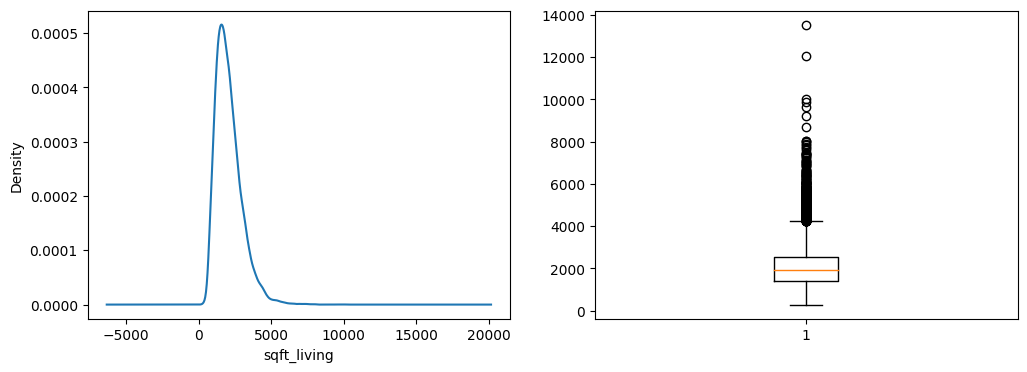

In [85]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living'].plot(kind='kde')
plt.xlabel('sqft_living')

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['sqft_living'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_living) ada di angka 2000an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

univariate analysis variabel 'grade'

C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


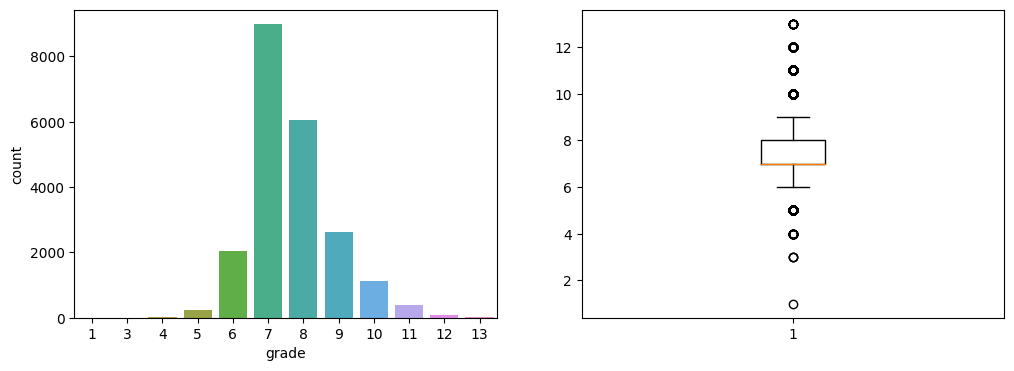

In [25]:
# #univariate analysis variabel 'grade'
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

In [26]:
dataFrame['grade'].value_counts().sort_index(ascending = True)

1        1
3        3
4       29
5      242
6     2038
7     8980
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

informasi:
- kebanyakan rumah memiliki grade 7 dan 8
- boxplot menunjukkan ada outlier di bawah garis minimum dan diatas garis maksimum

univariate analysis variabel 'floors'

C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


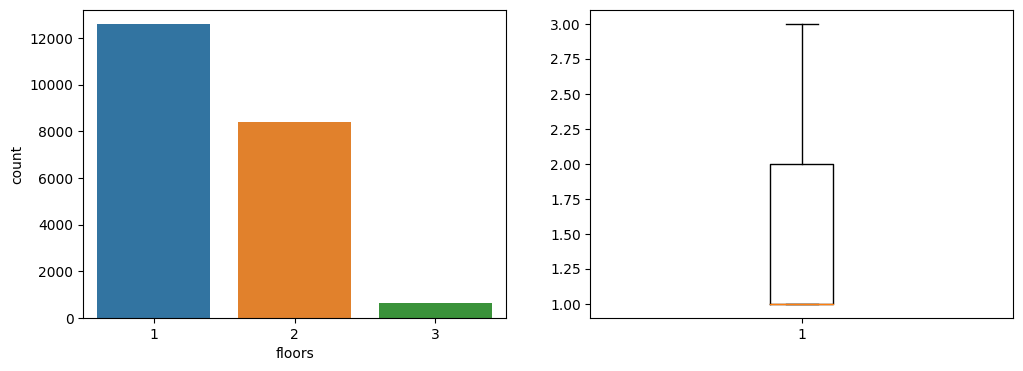

In [27]:
# univariate analysis variabel 'floors'
f = plt.figure(figsize=(12,4))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['floors'])

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['floors'])
plt.show()

In [28]:
dataFrame['floors'].value_counts().sort_index(ascending = True)

1    12589
2     8402
3      621
Name: floors, dtype: int64

informasi:
- kebanyakan rumah memiliki 1 lantai

univariate analysis variabel 'yr_built'

C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1901'),
  Text(2, 0, '1902'),
  Text(3, 0, '1903'),
  Text(4, 0, '1904'),
  Text(5, 0, '1905'),
  Text(6, 0, '1906'),
  Text(7, 0, '1907'),
  Text(8, 0, '1908'),
  Text(9, 0, '1909'),
  Text(10, 0, '1910'),
  Text(11, 0, '1911'),
  Text(12, 0, '1912'),
  Text(13, 0, '1913'),
  Text(14, 0, '1914'),
  Text(15, 

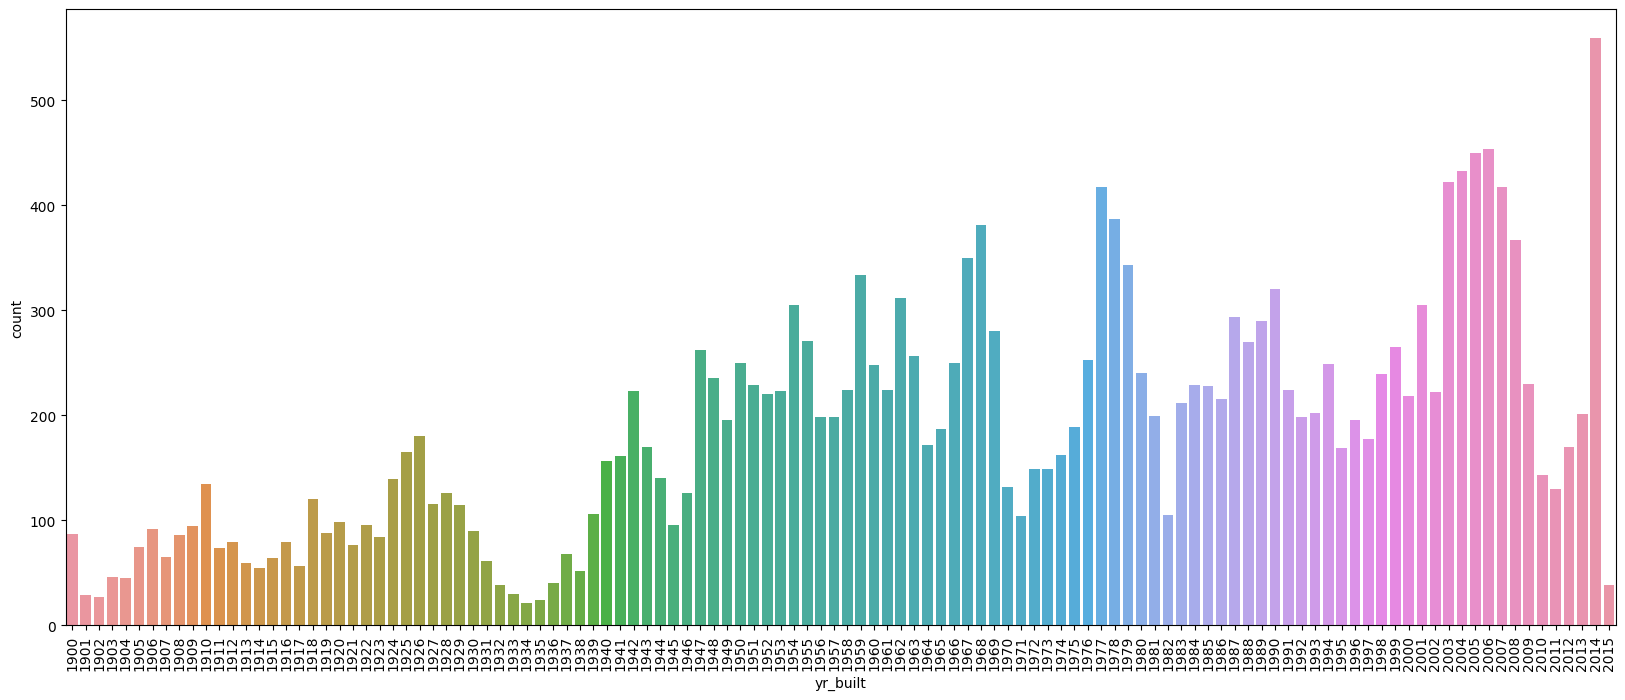

In [29]:
# univariate analysis variabel 'yr_built'
# melihat distribusi dari variabel 'yr_built'
f = plt.figure(figsize=(20,8))
sns.countplot(dataFrame['yr_built'])
plt.xticks(rotation=90)

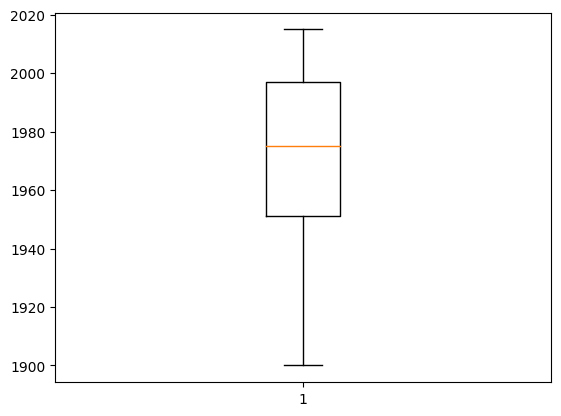

In [30]:
plt.boxplot(dataFrame['yr_built'])
plt.show()

In [31]:
dataFrame['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

informasi:
- rumah dengan 'yr_built' tua cukup sedikit yang dijual
- rumah dengan 'yr_built' paling muda juga cukup sedikit yang dijual
- dari boxplot yang dihasilkan, tidak ada outliers dari kolom tersebut

dari informasi diatas menunjukkan bahwa rumah yang paling banyak dijual adalah rumah dengan 'yr_built' 2014'

### Bivariate analysis 
#### Bivariate analysis berfungsi untuk melihat hubungan antara variabel satu dengan variabel lain, dalam kasus ini adalah variabel indepen terhadap variabel dependen(price)


C:\Users\Office-017\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


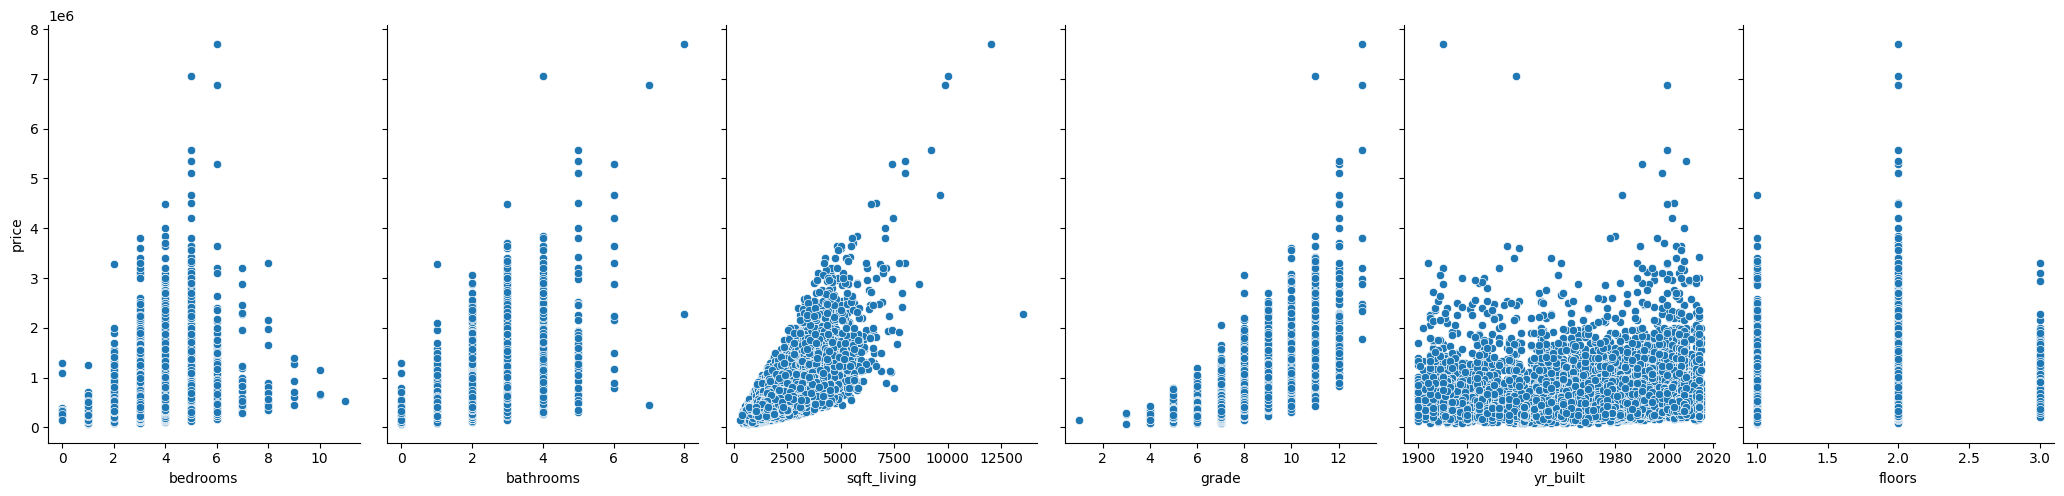

In [32]:
plt.Figure(figsize=(10, 8))
sns.pairplot(data=dataFrame,
             x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built', 'floors'], 
             y_vars=['price'],
             size=5,
             aspect=0.7)

informasi:
- rumah dengan jumlah 'bedrooms' 5 dan 6 justru memiliki harga yang lebih tinggi dibanding rumah dengan 'bedrooms' yang lebih banyak
- Semakin banyak jumlah 'bathrooms' maka semakin bervariasi harga dari rumah
- 'sqft_living' hingga 6000 memiliki kepadatan yang tinggi, harga rumah memiliki variasi yang lebih pada ukuran 'sqft_living' tersebut
- semakin tinggi 'grade' maka harga rumah cenderung semakin mahal
- 'yr_built' persebaran yang merata, rumah dengan 'yr_built' tua bisa memiliki harga yang murah maupun mahal
- 'floors' dengan angka 2 memiliki harga yang lebih bervariasi dan cenderung lebih tinggi dibanding 1 dan 3

Melihat variabel yang paling berpengaruh terhadap harga

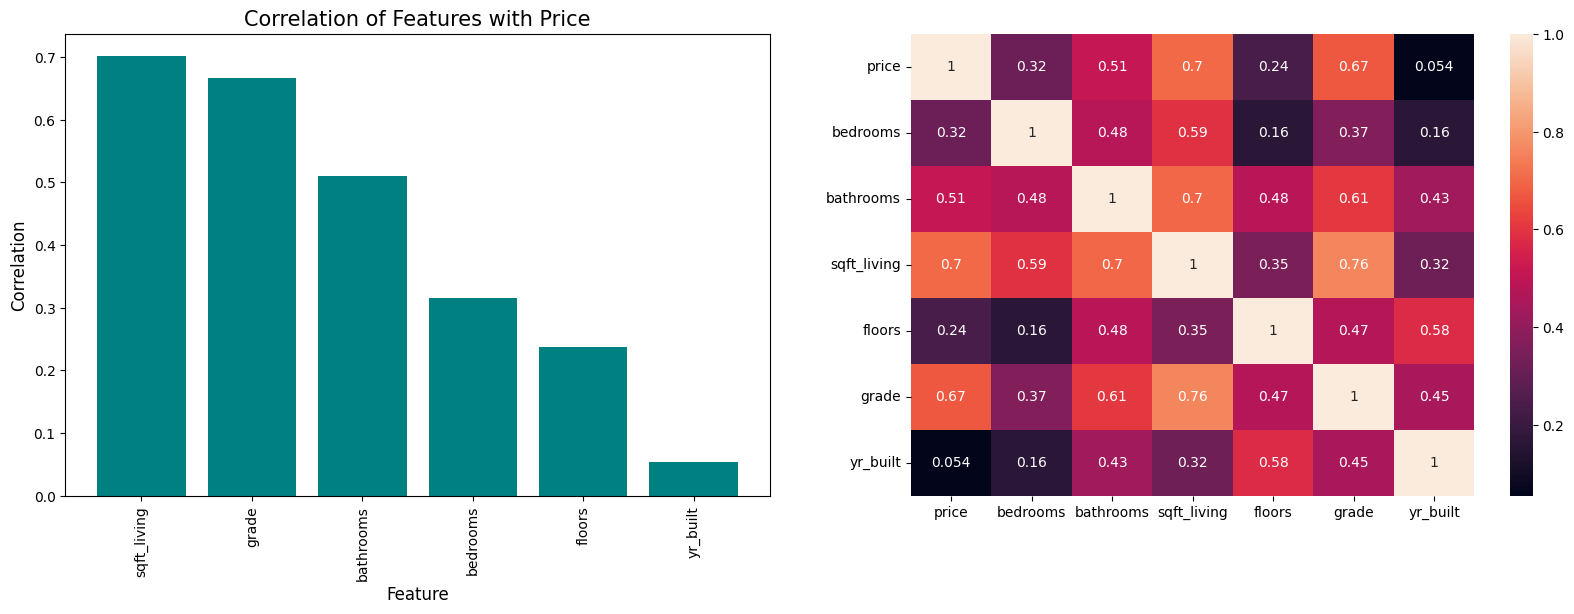

In [33]:
# Melihat variabel yang paling berpengaruh terhadap harga
cor = dataFrame.corr()['price'].sort_values(ascending=False).drop(['price'])
f=plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)

f.add_subplot(1,2,2)
sns.heatmap(dataFrame.corr(), annot=True)
plt.show()

variabel 'sqft_living' memiliki pengaruh paling tinggi terhadap harga, sedangkan variabel 'yr_built' memiliki pengaruh paling rendah terhadap harga

## 3. Modelling

Dalam proses ini kita akan melakukan pembagian data menjadi data train dan data test, kemudian membandingkan akurasi dari beberapa algoritma regression

In [34]:
#melihat 10 data pertama
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900.0,3,1,1180,1,7,1955
1,538000.0,3,2,2570,2,7,1951
2,180000.0,2,1,770,1,6,1933
3,604000.0,4,3,1960,1,7,1965
4,510000.0,3,2,1680,1,8,1987
5,1225000.0,4,4,5420,1,11,2001
6,257500.0,3,2,1715,2,7,1995
7,291850.0,3,1,1060,1,7,1963
8,229500.0,3,1,1780,1,7,1960
9,323000.0,3,2,1890,2,7,2003


In [35]:
#melihat 10 data terakhir
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
21603,507250.0,3,2,2270,2,8,2003
21604,429000.0,3,2,1490,3,8,2014
21605,610685.0,4,2,2520,2,9,2014
21606,1007500.0,4,3,3510,2,9,2009
21607,475000.0,3,2,1310,2,8,2008
21608,360000.0,3,2,1530,3,8,2009
21609,400000.0,4,2,2310,2,8,2014
21610,402101.0,2,0,1020,2,7,2009
21611,400000.0,3,2,1600,2,8,2004
21612,325000.0,2,0,1020,2,7,2008


Membuat variabel 'X' sebagai variabel independen, variabel diambil dari data yang sudah ada, variabel 'price' dihilangkan karena merupakan variabel dependen

Variabel 'y' berisi variabel 'price' sebagai variabel dependen

In [36]:
# X(Independent variables) and y(target variables) 
X = dataFrame[['bedrooms', 'bathrooms',	'sqft_living',	'grade', 'floors',	'yr_built']]
y = dataFrame['price']

In [37]:
X

,bedrooms,bathrooms,sqft_living,grade,floors,yr_built
0,3,1,1180,7,1,1955
1,3,2,2570,7,2,1951
2,2,1,770,6,1,1933
3,4,3,1960,7,1,1965
4,3,2,1680,8,1,1987
...,...,...,...,...,...,...
21608,3,2,1530,8,3,2009
21609,4,2,2310,8,2,2014
21610,2,0,1020,7,2,2009
21611,3,2,1600,8,2,2004


In [38]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21612, dtype: float64

import train_test_split dari sklearn yang berfungsi membagi data yang kita gunakan menjadi data train dan data test

In [39]:
from sklearn.model_selection import train_test_split

split data training dan data testing dengan pembagian 70%(training) dan 30%(testing), pembagian data bisa bervariasi sesuai keinginan, umumnya dibagi menjadi 80 20 atau 70 30

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [41]:
#cek shape data train dan test
print("x_train: ", X_train.shape)
print("x_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (15128, 6)
x_test:  (6484, 6)
y_train:  (15128,)
y_test:  (6484,)


In [42]:
X_train

,bedrooms,bathrooms,sqft_living,grade,floors,yr_built
2934,4,2,2100,8,2,2002
2564,4,3,3900,10,1,1972
11954,5,1,1990,7,1,1955
20158,2,1,830,7,2,2006
4954,3,2,1800,8,1,1976
...,...,...,...,...,...,...
14565,5,3,3800,7,1,1965
15649,4,1,1940,8,1,1974
10123,3,2,1890,8,2,2000
5600,4,3,4020,11,2,2001


In [43]:
X_test.head(10)

,bedrooms,bathrooms,sqft_living,grade,floors,yr_built
5533,3,1,1660,7,1,1941
625,3,1,960,6,1,1944
14950,3,1,850,7,1,1986
13654,3,2,1860,7,1,1976
3929,3,2,1590,7,1,1976
10965,2,1,940,5,1,1942
8359,4,2,2360,6,1,1925
18853,3,2,2160,8,2,1982
864,4,2,2050,8,2,1990
11703,3,3,1670,7,1,1929


In [44]:
y_test.head(10)

5533     530000.0
625      289500.0
14950    295000.0
13654    267500.0
3929     405000.0
10965    283000.0
8359     459000.0
18853    475000.0
864      280000.0
11703    294000.0
Name: price, dtype: float64

In [45]:
y_train

2934      380000.0
2564     1620000.0
11954     185000.0
20158     205000.0
4954      474900.0
           ...    
14565     380000.0
15649     252000.0
10123     465000.0
5600     1691000.0
14000     470000.0
Name: price, Length: 15128, dtype: float64

In [46]:
y_test

5533     530000.0
625      289500.0
14950    295000.0
13654    267500.0
3929     405000.0
           ...   
8614     575700.0
15978    376950.0
12084    338000.0
19119    747500.0
11052    398000.0
Name: price, Length: 6484, dtype: float64

### Percobaan dengan beberapa algoritma regression

#### Linear Regression

In [86]:
#menggunakan model linear regression
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [87]:
print('akurasi dengan data train:', linReg.score(X_train, y_train)*100)

akurasi dengan data train: 61.74012796448525


#### Gradient Boosting Regression

In [92]:
#menggunakan model gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)


GradientBoostingRegressor()

In [93]:
print('akurasi dengan data train:', GBR.score(X_train, y_train)*100)

akurasi dengan data train: 73.07654423210988


#### Random Forest Regression

In [96]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

RFG = RandomForestRegressor(n_estimators=300,random_state=50)
RFG.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=50)

In [97]:
print('akurasi dengan data train:', RFG.score(X_train, y_train)*100)

akurasi dengan data train: 94.64860767576566


Dari hasil percobaan ketiga algoritma, algoritma dengan akurasi paling tinggi adalah Random Forest Regression

- RFG = RandomForestRegressor(n_estimators=200, max_depth=200)
- akurasi: 94.63265849272376

==============================================

- RFG = RandomForestRegressor(n_estimators=300)
- akurasi = 94.64595082082823

==============================================

- RFG = RandomForestRegressor(n_estimators=300, max_depth=1000)
- akurasi: 94.66362656403754

==============================================

- RFG = RandomForestRegressor(n_estimators=300, random_state=50)
- akurasi: 94.68145042511402

=============================================

- RFG = RandomForestRegressor(n_estimators=300,random_state=50)
- akurasi: 94.7607558487369

yang baru:
- ditambah variabel 'floors'

kesimpulan:
dengan beberapa percobaan parameter, hasil tertinggi adalah:
- RFG = RandomForestRegressor(n_estimators=300,random_state=50)
- akurasi tertinggi(dengan data train): 94.7607558487369


Cek MAPE dan R Square

In [55]:
#cek MAPE untuk dan r2 random forest regressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

print("mean absolute percentage error:", mean_absolute_percentage_error(y_test, RFG.predict(X_test))*100)
print("r2 score:", r2_score(y_test, RFG.predict(X_test))*100)

mean absolute percentage error: 28.20851748714248
r2 score: 64.71446412917705


Mean Absolute Percentage Error (MAPE):
- MAPE (Mean Absolute Percent Error) digunakan jika ukuran variabel peramalan merupakan faktor penting dalam mengevaluasi akurasi peramalan tersebut. MAPE memberikan petunjuk seberapa besar kesalahan peramalan dibandingkan dengan nilai sebenarnya

- Berdasarkan Lewis (1982), nilai MAPE dapat diinterpretasikan atau ditafsirkan ke dalam 4 kategori yaitu: <10% = sangat akurat. 10-20% = baik. 20-50% = wajar.


R2 (R squared score):
- R squared merupakan angka yang berkisar antara 0 sampai 1 (0 sampai 100 jika dalam persen) yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.

- Menurut Chin (1998), nilai R-Square dikategorikan kuat jika lebih dari 0,67, moderat jika lebih dari 0,33 tetapi lebih rendah dari 0,67, dan lemah jika lebih dari 0,19 tetapi lebih rendah dari 0,33.

Sample dari harga asli dan harga prediksi

In [56]:
# Sample dari harga asli dan harga prediksi
y_pred = RFG.predict(X_test)
y_df = pd.DataFrame(y_test)
y_df['PredictedPrice']=y_pred
y_df.head(10)

,price,PredictedPrice
5533,530000.0,500107.388889
625,289500.0,431727.205556
14950,295000.0,324250.222222
13654,267500.0,422417.777778
3929,405000.0,317129.737889
10965,283000.0,250219.916667
8359,459000.0,409860.500000
18853,475000.0,565129.466667
864,280000.0,512415.953333
11703,294000.0,555900.520000


In [57]:
y_df

,price,PredictedPrice
5533,530000.0,500107.388889
625,289500.0,431727.205556
14950,295000.0,324250.222222
13654,267500.0,422417.777778
3929,405000.0,317129.737889
...,...,...
8614,575700.0,560623.777778
15978,376950.0,455348.564444
12084,338000.0,457058.840000
19119,747500.0,617698.525397


Melihat rata-rata persentase selisih antara price dan PredictedPrice

In [58]:
#melihat rata-rata persentase selisih antara price dan PredictedPrice
y_df['Difference'] = (y_df['PredictedPrice']-y_df['price'])
y_df['Difference'] = y_df['Difference']/y_df['price']*100 
selisih = y_df['Difference'].mean()
print('rata-rata persentase selisih antara harga asli dan harga prediksi: ', selisih, '%')

rata-rata persentase selisih antara harga asli dan harga prediksi:  9.566747327763267 %


Mencoba beberapa inputan dan melihat prediksi

In [59]:
print("1.")
print("harga aktual: 530000")
harga_pred = RFG.predict([[3,	1,	1660,	7,	1,	1941]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-530000)/530000)*100, "%")

1.
harga aktual: 530000
harga prediksi: [500107.38888889]
persentase perbedaan: [-5.6401153] %


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Plot antara harga prediksi dengan harga real

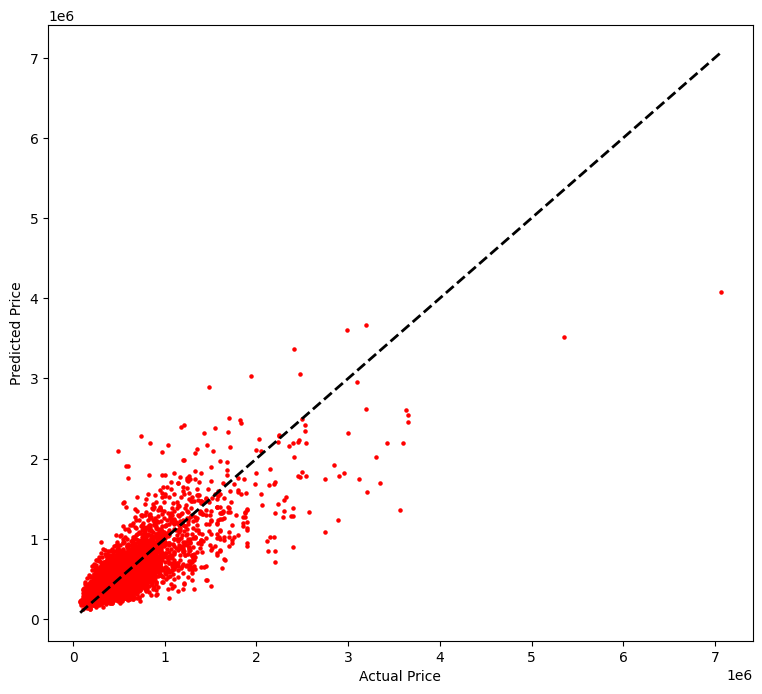

In [98]:
#melihat plot antara harga prediksi dengan harga real
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
plt.scatter(y_test, RFG.predict(X_test), color='red', s=5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Jika plot semakin rapat dengan garis putus-putus, maka menunjukkan bahwa harga prediksi dan harga aktual memiliki selisih yang kecil

In [61]:
#melihat variance score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("variance score:", explained_variance_score(y_test, RFG.predict(X_test)))
print("mean squared error:", mean_squared_error(y_test, RFG.predict(X_test)))
print("r2 score:", r2_score(y_test, RFG.predict(X_test)))

variance score: 0.6471446430445104
mean squared error: 48098660104.24659
r2 score: 0.6471446412917705


## 4. SIMPAN MODEL KE DALAM FILE PICKLE
Model disimpan agar dapat digunakan untuk melakukan prediksi tanpa harus training ulang model, dan bisa digunakan di berbagai platform seperti website

In [62]:
import pickle

Membuat variabel 'filename' yang berisi nama file yang akan digunakan untuk menyimpan model

pickle.dump untuk menyimpan hasil training ke dalam file pickle yang telah dibuat

In [65]:
#Jika command dihilangkan maka kode akan bekerja

filename = 'model_prediksi_rumah_lama.pkl'
pickle.dump(RFG, open(filename, 'wb'))

Mencoba model yang telah disimpan

In [69]:
loaded_model = pickle.load(open('model_prediksi_rumah_lama.pkl', 'rb'))

print(loaded_model.predict([[3,	1,	1660,	7,	1,	1941]]))

[500107.38888889]


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model berhasil untuk dijalankan

menyimpan data yang telah dimodifikasi dan digunakan untuk training

In [ ]:
#eksport dataFrame menjadi file csv

#dataFrame.to_csv('dataFrame_test_train.csv')

catatan:
Model ini dapat dikembangkan lagi seperti meningkatkan akurasi, r2 score, menurunkan skor MAPE hingga di bawah 10% dengan pendekatan-pendekatan lain seperti mengubah algoritma, parameter, jumlah variabel, dan lain sebagainya

Model yang telah disimpan akan digunakan dalam website sehingga user lebih mudah dalam mendapatkan hasil prediksi

link website: https://house-predict1.herokuapp.com/